In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib notebook

<IPython.core.display.Javascript object>


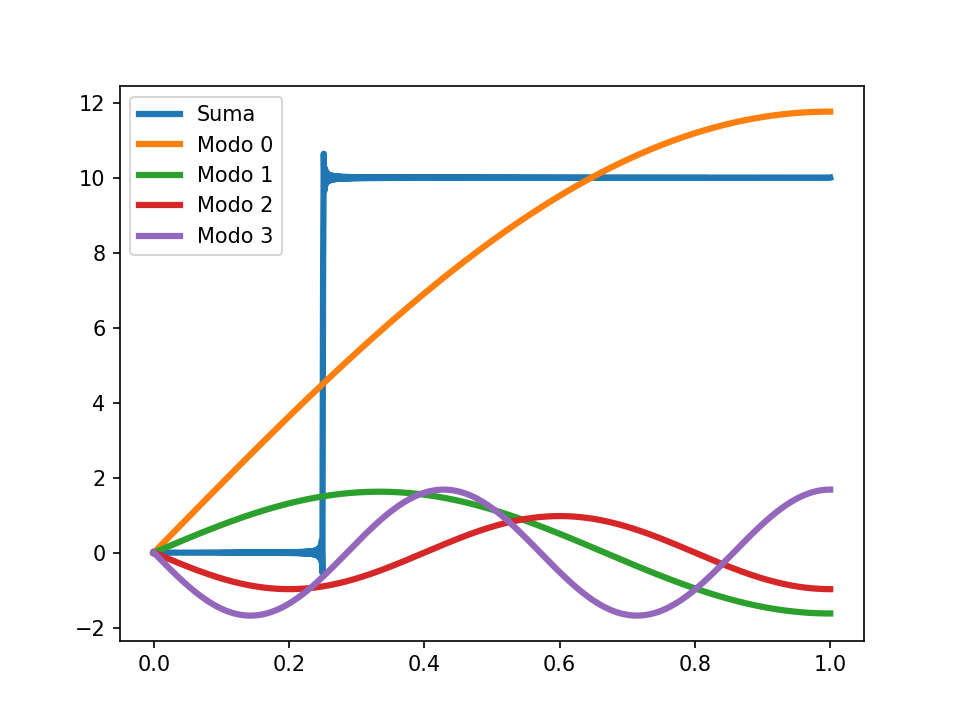

In [17]:
L = 1
psi0 = 10
c = 1
p_max = 1000
t = 0
x = np.linspace(0, L, 1000)


def k(p):
    return (2*p-1) * np.pi/(2*L) 

psies = [2*psi0/(L*k(p)) * np.cos(k(p)*L/4) * np.sin(k(p) * x) * np.cos(c * k(p) * t) for p in range(1, p_max)]

psi = np.sum(psies, 0)

plt.figure(1)
plt.clf()
plt.plot(x, psi, label = 'Suma', linewidth = 3)
for i in range(4):
    plt.plot(x, psies[i], label = f'Modo {i}', linewidth = 3)
plt.legend();

<IPython.core.display.Javascript object>


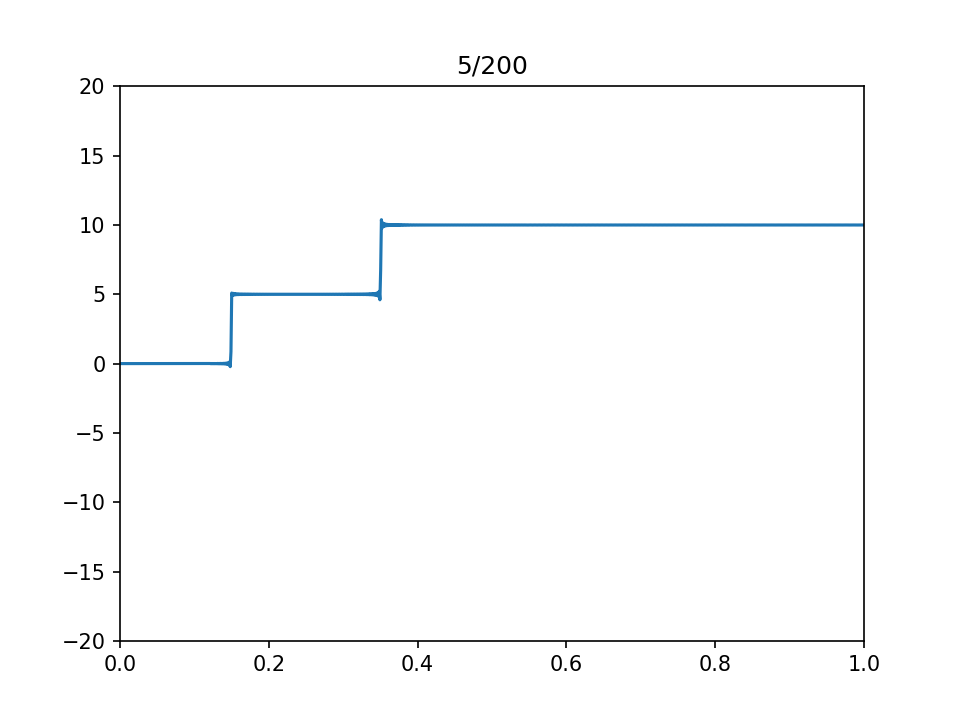

In [25]:
fig= plt.figure(2)
plt.clf()
ax = plt.gca()

w0 = c*k(0)
periodo = 2*np.pi/(w0)
times = np.linspace(0, periodo, 200)

def psi_t(t):
    psies = [2*psi0/(L*k(p)) * np.cos(k(p)*L/4) * np.sin(k(p) * x) * np.cos(c * k(p) * t) for p in range(1, p_max)]
    psi = np.sum(psies, 0)
    return psi

line, = ax.plot([], []);
ax.set_title(f'0')
plt.xlim(0, 1)
plt.ylim(-20, 20)
def drawframe(i):
    psi = psi_t(times[i])
    line.set_data(x, psi);
    ax.set_title(f'{i}/{len(times)}')
    return (line, )

anim = animation.FuncAnimation(fig, drawframe, frames = 200, interval = 10, blit = True);